In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Losses.xlsx")

In [3]:
df.sample(5)

,DAY,MONTH,MONTH_ID,YEAR,CAUSE,GROSS INCURRED AMOUNT
13963,21,July,7,2003,ESCAPE OF WATER,60.00
6830,15,July,7,2001,ACCIDENTAL DAMAGE,250.00
4146,30,October,10,2000,FLOOD,26882.35
30567,3,July,7,2006,FLOOD,370.00
26807,28,December,12,2005,THEFT,192.20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47565 entries, 0 to 47564
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DAY                    47565 non-null  int64  
 1   MONTH                  47565 non-null  object 
 2   MONTH_ID               47565 non-null  int64  
 3   YEAR                   47565 non-null  int64  
 4   CAUSE                  47565 non-null  object 
 5   GROSS INCURRED AMOUNT  47565 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.2+ MB


In [5]:
df.describe()

,DAY,MONTH_ID,YEAR,GROSS INCURRED AMOUNT
count,47565.000000,47565.000000,47565.000000,47565.000000
mean,15.182802,6.379270,2004.335583,1072.416586
std,9.224491,3.579773,2.463259,3997.920914
min,1.000000,1.000000,1999.000000,-31989.780000
25%,7.000000,3.000000,2002.000000,158.630000
50%,15.000000,7.000000,2005.000000,400.000000
75%,23.000000,10.000000,2006.000000,888.610000
max,31.000000,12.000000,2007.000000,249499.510000


### What are the total claims by year and what trends are there? What could be driving these trends?
#### a.	What are the total value of claims by year?
#### b.	What factors, internal and external to the insurer, could be driving any trends that you have identified?


In [6]:
df1a = df.groupby("YEAR")["GROSS INCURRED AMOUNT"].sum().reset_index()
df1a
#Total value of Claims by Year

,YEAR,GROSS INCURRED AMOUNT
0,1999,1505461.74
1,2000,3337319.82
2,2001,3536859.59
3,2002,3281628.01
4,2003,3137249.46
5,2004,4034545.31
6,2005,6271443.43
7,2006,9892171.66
8,2007,16012815.90


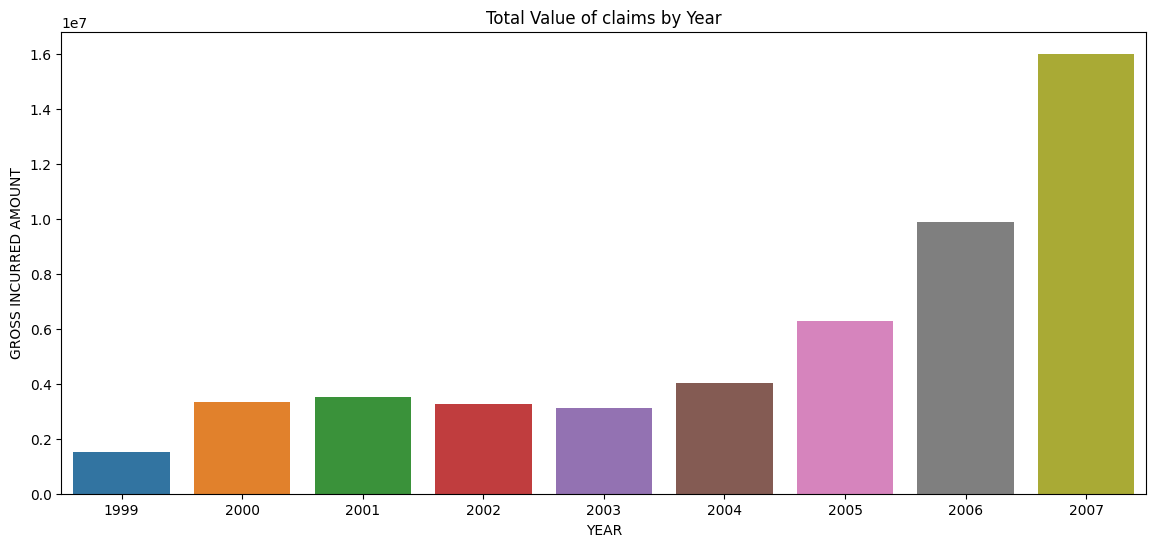

In [7]:
plt.figure(figsize=(14,6))
sns.barplot(x="YEAR",y="GROSS INCURRED AMOUNT",data=df1a)
plt.title("Total Value of claims by Year")
plt.show()

In [8]:
df1b = df.groupby("CAUSE").sum()["GROSS INCURRED AMOUNT"].reset_index()
df1b

,CAUSE,GROSS INCURRED AMOUNT
0,ACCIDENTAL DAMAGE,8794505.93
1,EARTHQUAKE,775546.61
2,ESCAPE OF WATER,3407217.99
3,FIRE,7051512.03
4,FLOOD,9603596.56
5,SUBSIDENCE,4776765.24
6,THEFT,7183624.98
7,WINDSTORM,9416725.58


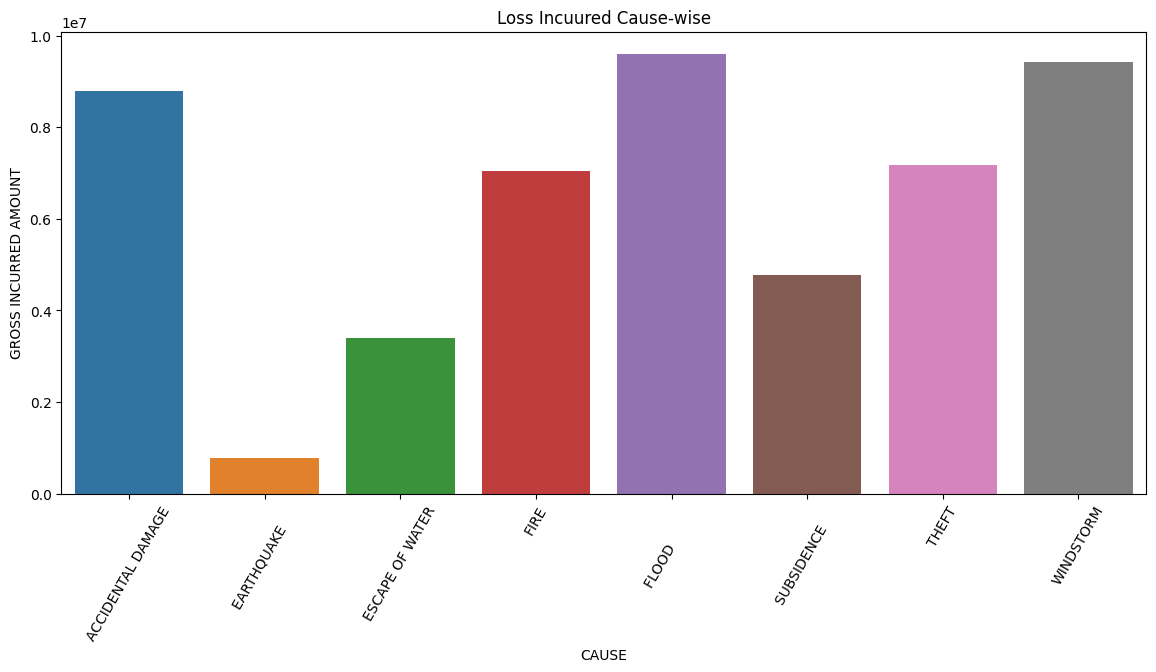

In [9]:
plt.figure(figsize=(14,6))
plt.title("Loss Incuured Cause-wise")
sns.barplot(data=df1b, x="CAUSE",y="GROSS INCURRED AMOUNT")
plt.xticks(rotation=60)
plt.show()

#### - We can see from the Graph of total Value of Claims by year that losses increase in year 2005 and went high till year 2007
#### - To identify the trends in the increase of these losses, we will analyze these 3 years and understand the causes in these years


In [10]:
causes = df["CAUSE"].unique().tolist()

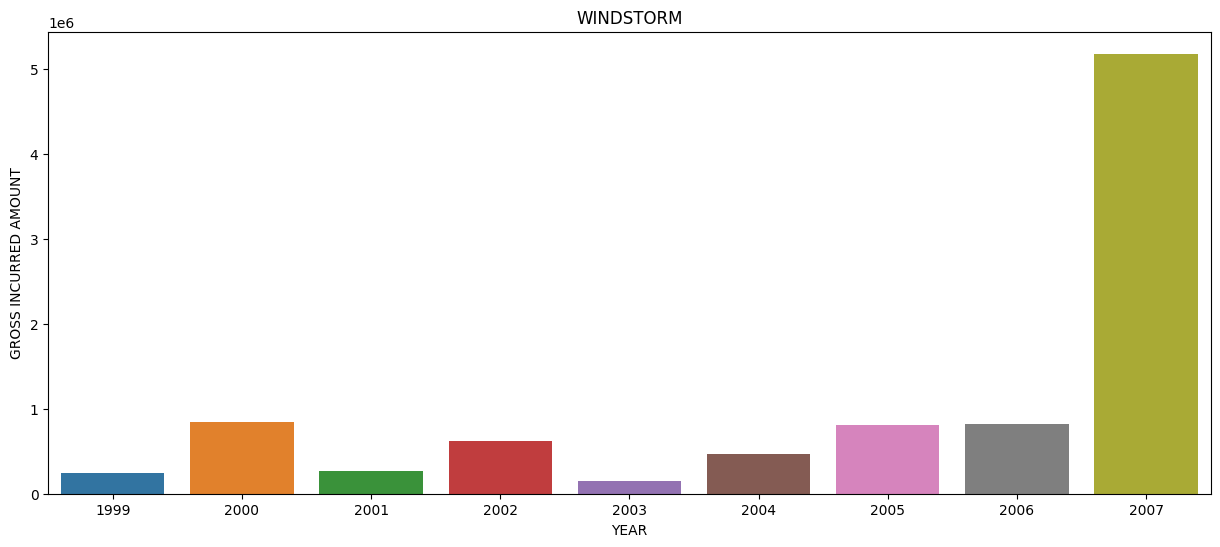

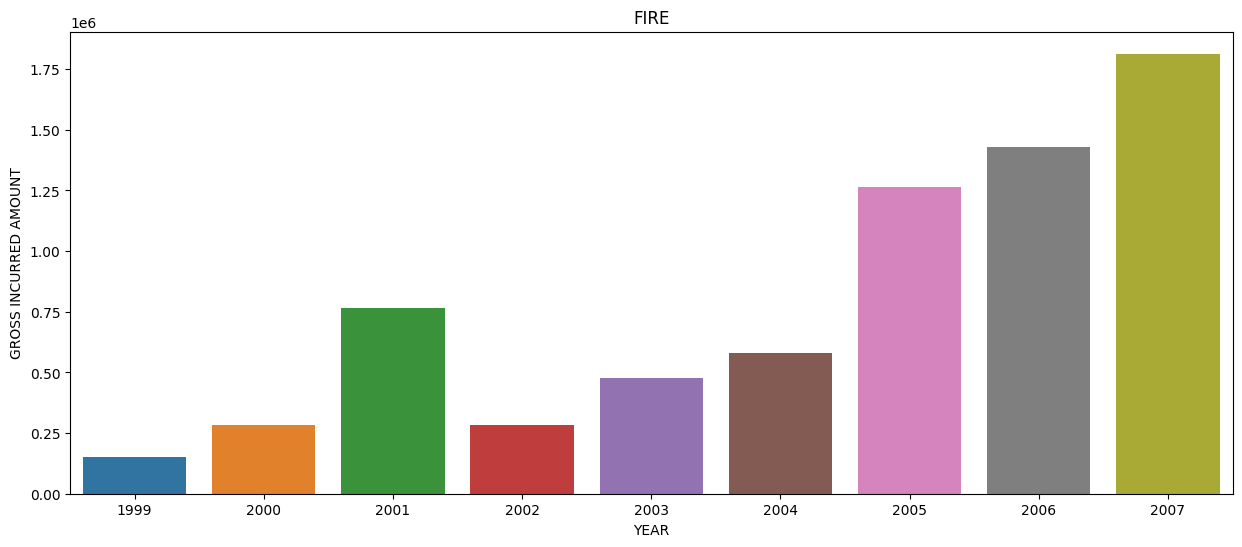

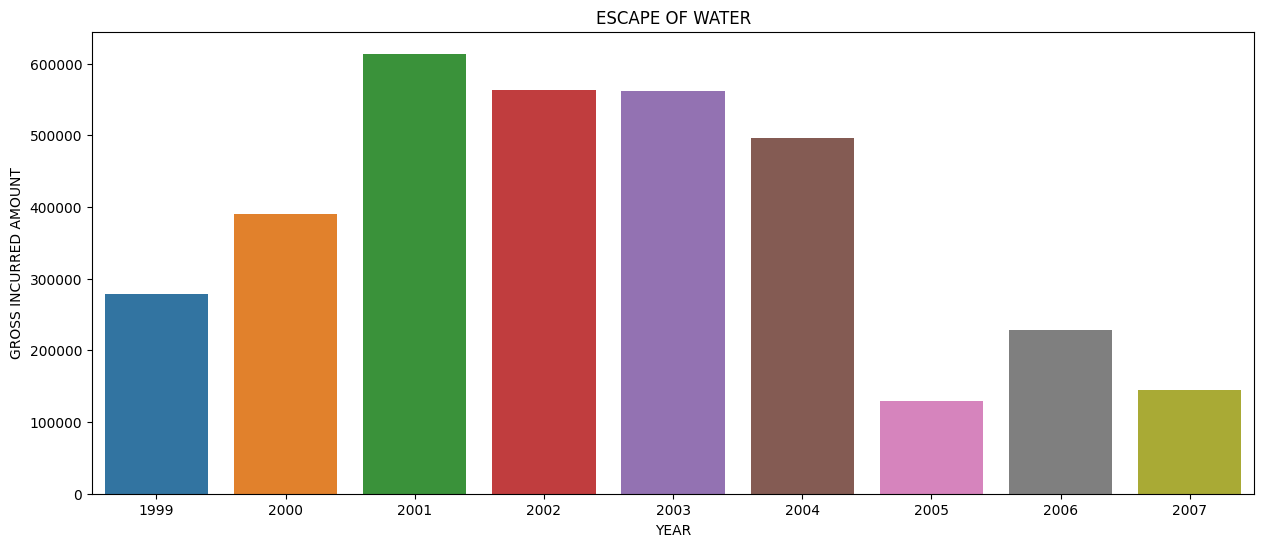

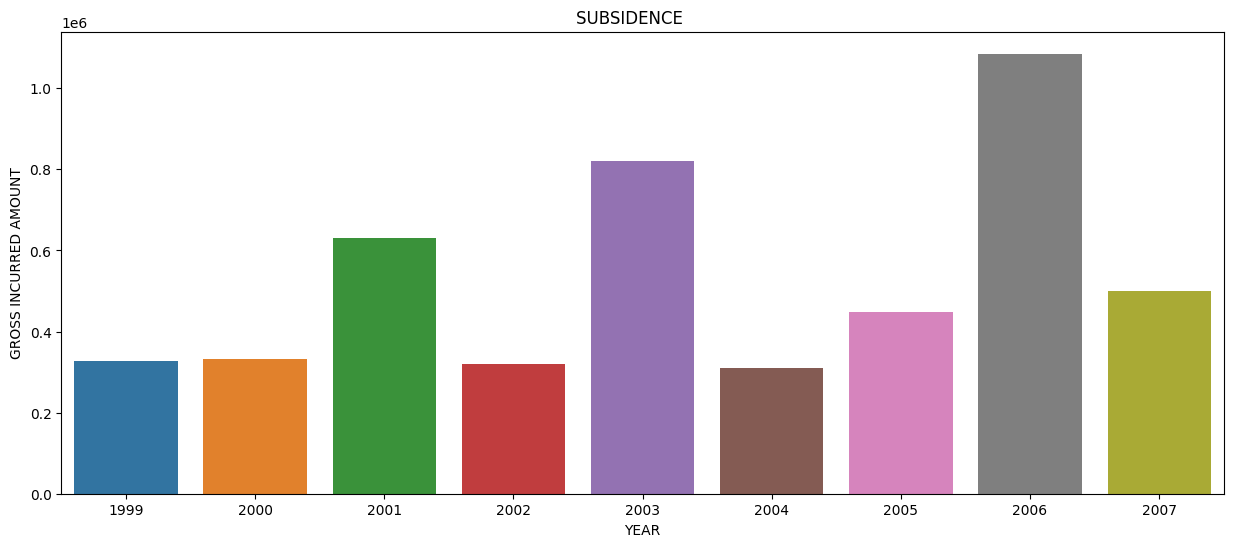

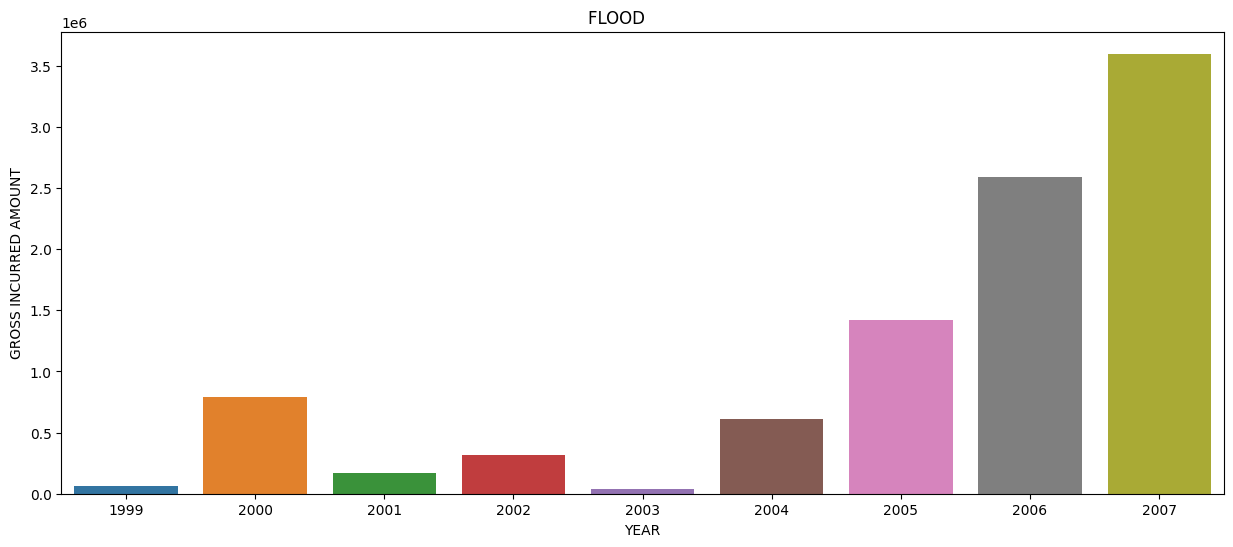

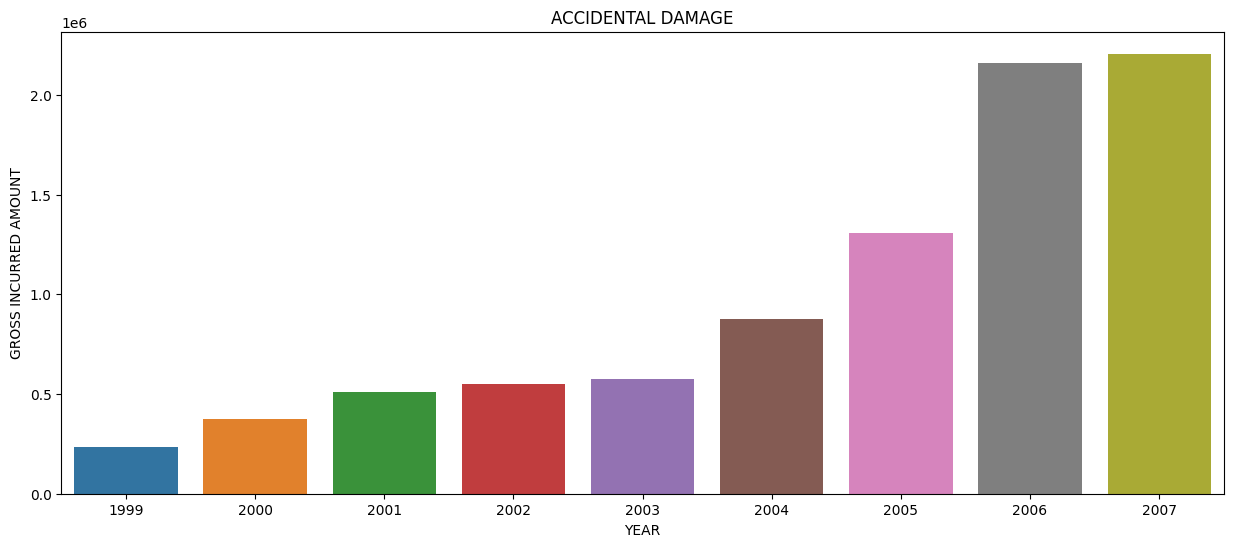

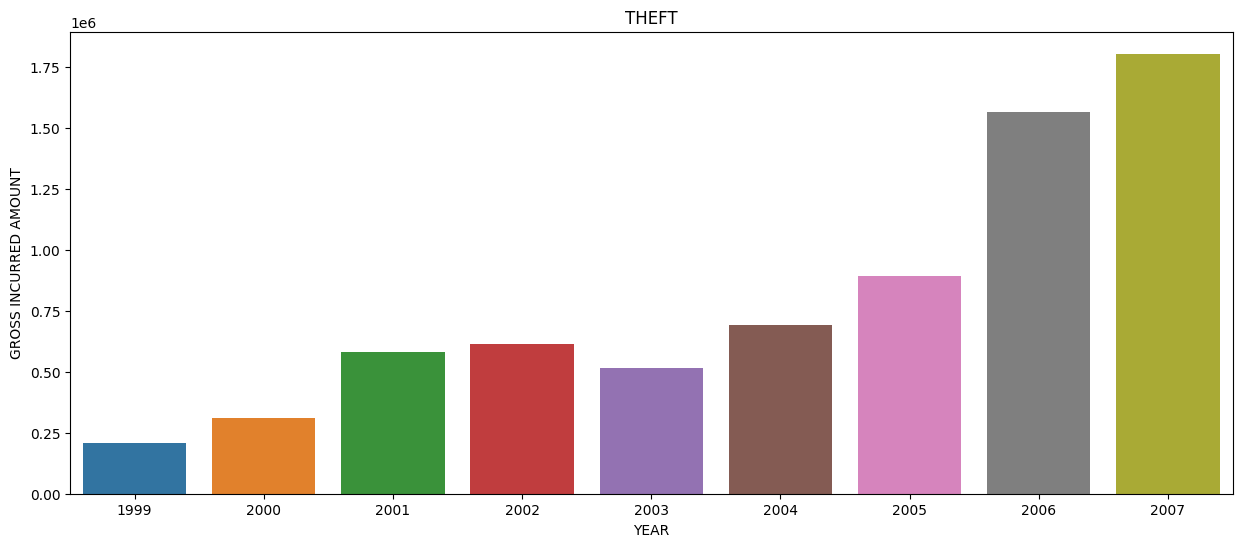

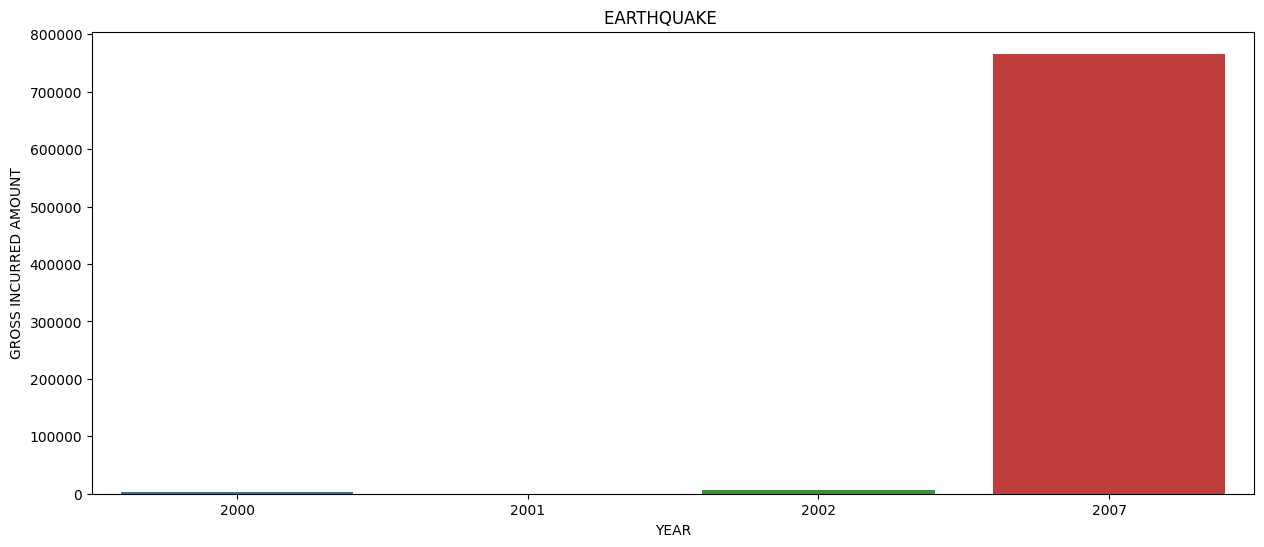

In [11]:
yc = df.groupby(['YEAR','CAUSE']).sum().reset_index()
yc.drop(columns=["DAY","MONTH_ID"],inplace=True)

for i in causes:    
    yci = yc[yc["CAUSE"]==i]
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    sns.barplot(data=yci,x="YEAR",y="GROSS INCURRED AMOUNT")
    plt.title(i)
    plt.show()

### From the above graphs which gives information about losses incurred in each year due to different causes, it can be said that:
### *1) Loss incurred due to external factores such as Fire, Flood and internal factors such as Accidental Damage, Theft increased in the years 2005 to 2007*
### *2) Also, Windstorm and Earthquake had a major effect in increasing the losses in the year 2007*


In [12]:
pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

### Which perils should the company worry about most and why?
#### a.	Which claim types (perils) have the greatest average annual frequency and severity?  
#### b.	What is the average individual claim size by peril across the 9-year time period?


In [13]:
df2 = df["CAUSE"].value_counts().reset_index()

In [14]:
df2["Annual avg freq"] = df2["CAUSE"].apply(lambda x: x/9)
df2

,index,CAUSE,Annual avg freq
0,ACCIDENTAL DAMAGE,17993,1999.222222
1,WINDSTORM,9867,1096.333333
2,THEFT,7564,840.444444
3,FLOOD,5175,575.000000
4,ESCAPE OF WATER,3964,440.444444
5,FIRE,2046,227.333333
6,SUBSIDENCE,818,90.888889
7,EARTHQUAKE,138,15.333333


#### Accidental Damage has the highest average annual frequency followed by Windstorm

In [15]:
# To understand severity, calculating average annual loss for each peril
for i in causes:    
    yci = yc[yc["CAUSE"]==i]["GROSS INCURRED AMOUNT"].sum()
    print(i)
    print(yci/9)

WINDSTORM
1046302.8422222222
FIRE
783501.3366666667
ESCAPE OF WATER
378579.7766666667
SUBSIDENCE     
530751.6933333332
FLOOD          
1067066.2844444446
ACCIDENTAL DAMAGE
977167.3255555555
THEFT
798180.5533333333
EARTHQUAKE     
86171.84555555556


#### Severity of Flood is the highest followed by Windstorm and Accidental Damage
### Hence, looking at the frequency of occurence and the severity of losses incurred, the company needs to worry about Flood, Windstorm and Accidental Damage

### What did Windstorm Erwin cost the company? What perils drove the loss?
#### a.	What was the total loss, for windstorm and other related weather perils, for Windstorm Erwin (date Jan 7th to Jan 9th, 2005)


In [16]:
df3 = df[(df["YEAR"]==2005.0) & (df["MONTH_ID"]==1.0) & (df["DAY"].isin([7,8,9])) & (df["CAUSE"].isin(["FLOOD          ","WINDSTORM"]))]
df3.sample(5)

,DAY,MONTH,MONTH_ID,YEAR,CAUSE,GROSS INCURRED AMOUNT
20808,8,January,1,2005,WINDSTORM,5967.63
20789,8,January,1,2005,WINDSTORM,500.00
20486,7,January,1,2005,WINDSTORM,425.00
20506,7,January,1,2005,WINDSTORM,800.00
20653,8,January,1,2005,WINDSTORM,0.00


In [17]:
df3["GROSS INCURRED AMOUNT"].sum()

305606.24

### Total Loss for Windstorm Ervin (date 7th to 9th Jan 2005) = 305606.24

### Write a ML/DL program which takes the data as input and predicts the most probable peril even which can happen in next year. The model should come with proper accuracy assessment of the model.

In [18]:
df.sample(5)

,DAY,MONTH,MONTH_ID,YEAR,CAUSE,GROSS INCURRED AMOUNT
155,31,March,3,1999,FIRE,415.00
4356,30,October,10,2000,WINDSTORM,939.05
23950,20,July,7,2005,ACCIDENTAL DAMAGE,105.85
32734,14,September,9,2006,ESCAPE OF WATER,119.95
23569,28,June,6,2005,ACCIDENTAL DAMAGE,375.00


In [19]:
from statsmodels.tsa.ar_model import AutoReg

In [20]:
import statsmodels.formula.api as smf

In [21]:
yc = df.groupby(['YEAR','CAUSE']).sum().reset_index()
yc.drop(columns=["DAY","MONTH_ID"],inplace=True)
yc.head()

,YEAR,CAUSE,GROSS INCURRED AMOUNT
0,1999,ACCIDENTAL DAMAGE,231816.41
1,1999,ESCAPE OF WATER,279252.87
2,1999,FIRE,151618.38
3,1999,FLOOD,60557.34
4,1999,SUBSIDENCE,328004.21


In [22]:
yc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   67 non-null     int64  
 1   CAUSE                  67 non-null     object 
 2   GROSS INCURRED AMOUNT  67 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ KB


In [23]:
yc.columns = ["year","cause","amount"]

In [24]:
lm = smf.ols(formula='amount ~ C(year) + cause', data=yc)

In [25]:
residuals = lm.fit()

In [26]:
print(residuals.summary())
#not an appropriate model for sure

                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     4.176
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           6.17e-05
Time:                        03:50:56   Log-Likelihood:                -982.97
No. Observations:                  67   AIC:                             1998.
Df Residuals:                      51   BIC:                             2033.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [27]:
df["date"]=pd.to_datetime(dict(year=df.YEAR, month=df.MONTH_ID, day=df.DAY))
#create a datetime datatype column

In [28]:
df.head()

,DAY,MONTH,MONTH_ID,YEAR,CAUSE,GROSS INCURRED AMOUNT,date
0,1,January,1,1999,WINDSTORM,477.88,1999-01-01
1,1,January,1,1999,FIRE,700.00,1999-01-01
2,1,January,1,1999,WINDSTORM,99.87,1999-01-01
3,1,January,1,1999,WINDSTORM,139.80,1999-01-01
4,1,January,1,1999,WINDSTORM,548.66,1999-01-01


In [29]:
df.columns=["day","month","month_id","year","cause","amount","date"]

In [30]:
df.head()

,day,month,month_id,year,cause,amount,date
0,1,January,1,1999,WINDSTORM,477.88,1999-01-01
1,1,January,1,1999,FIRE,700.00,1999-01-01
2,1,January,1,1999,WINDSTORM,99.87,1999-01-01
3,1,January,1,1999,WINDSTORM,139.80,1999-01-01
4,1,January,1,1999,WINDSTORM,548.66,1999-01-01


In [31]:
new_df=df[["date","cause","amount"]]

In [32]:
new_df.head()

,date,cause,amount
0,1999-01-01,WINDSTORM,477.88
1,1999-01-01,FIRE,700.00
2,1999-01-01,WINDSTORM,99.87
3,1999-01-01,WINDSTORM,139.80
4,1999-01-01,WINDSTORM,548.66


In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47565 entries, 0 to 47564
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    47565 non-null  datetime64[ns]
 1   cause   47565 non-null  object        
 2   amount  47565 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.1+ MB


In [34]:
new_df.tail()

,date,cause,amount
47560,2007-12-28,FLOOD,1051.0
47561,2007-12-29,ACCIDENTAL DAMAGE,461.0
47562,2007-12-29,FLOOD,1051.0
47563,2007-12-29,FLOOD,1051.0
47564,2007-12-29,ACCIDENTAL DAMAGE,461.0


In [35]:
new_df.columns=["ds","cause","y"]

In [36]:
groups_by_cause = new_df.groupby('cause')

In [37]:
cause_list=list(groups_by_cause.groups.keys())
cause_list

['ACCIDENTAL DAMAGE',
 'EARTHQUAKE     ',
 'ESCAPE OF WATER',
 'FIRE',
 'FLOOD          ',
 'SUBSIDENCE     ',
 'THEFT',
 'WINDSTORM']

In [38]:
from prophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [39]:
def train_and_forecast(group):
    m = Prophet()
    m.fit(group)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)[['ds','yhat']]
    forecast['cause'] = group['cause'].iloc[0]
    return forecast[['ds', 'cause', 'yhat']]

In [40]:
accidental_damage = groups_by_cause.get_group('ACCIDENTAL DAMAGE')
#to see a separate "trend" of the amount incurred by accidental damage in future 

In [41]:
accidental_damage=accidental_damage[["ds","y"]]

In [42]:
m = Prophet()
m.fit(accidental_damage)

03:50:57 - cmdstanpy - INFO - Chain [1] start processing
03:50:59 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
future = m.make_future_dataframe(periods=365)

In [44]:
forecast = m.predict(future)

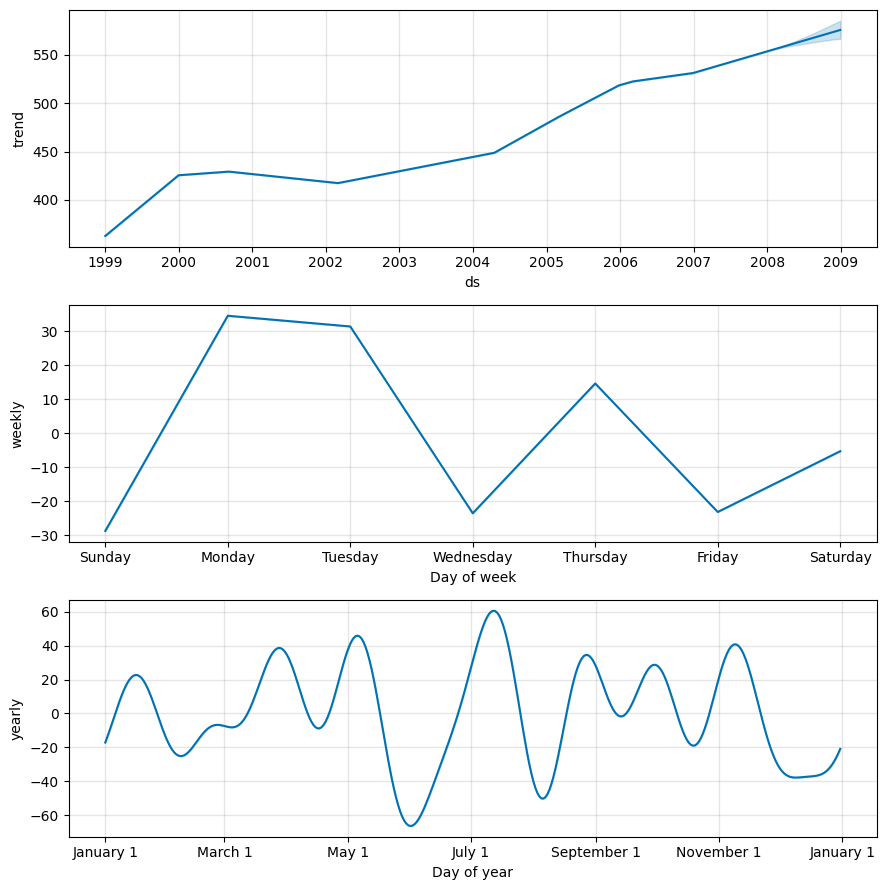

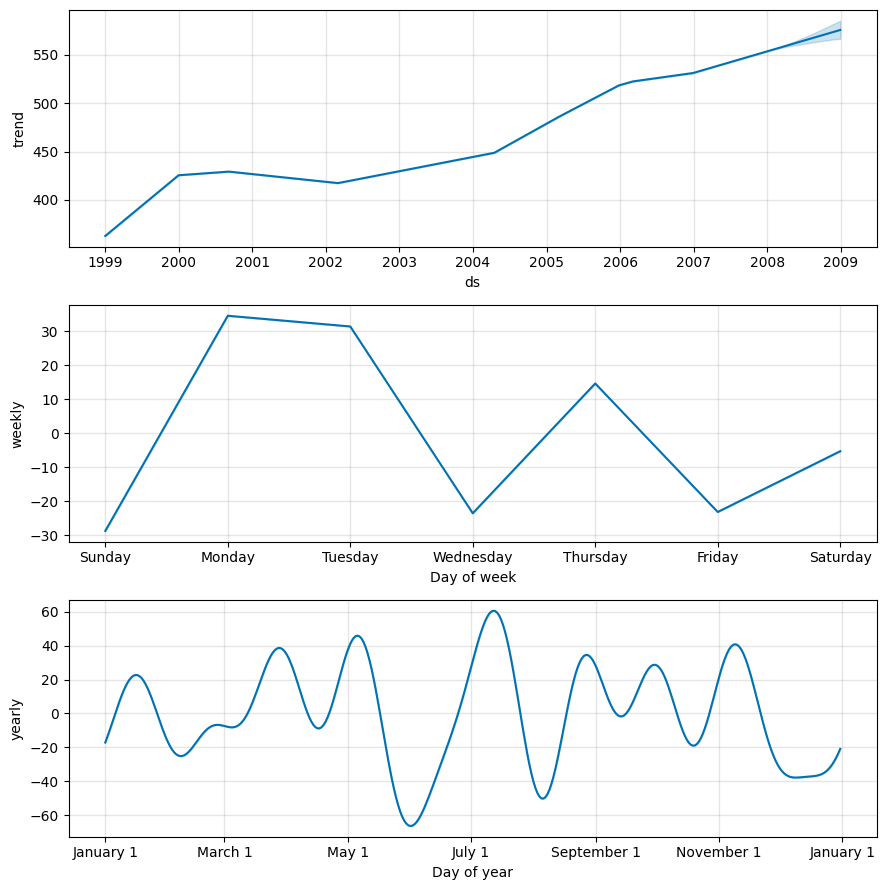

In [45]:
m.plot_components(forecast)

In [46]:
for_loop_forecast = pd.DataFrame()

for cause in cause_list:
    group = groups_by_cause.get_group(cause)
    forecast = train_and_forecast(group)
    for_loop_forecast = pd.concat((for_loop_forecast, forecast))

for_loop_forecast.head()
#this is to do multiple time series forecasting for each cause

03:51:02 - cmdstanpy - INFO - Chain [1] start processing
03:51:04 - cmdstanpy - INFO - Chain [1] done processing
03:51:04 - cmdstanpy - INFO - Chain [1] start processing
03:51:04 - cmdstanpy - INFO - Chain [1] done processing
03:51:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
03:51:04 - cmdstanpy - INFO - Chain [1] start processing
03:51:05 - cmdstanpy - INFO - Chain [1] done processing
03:51:05 - cmdstanpy - INFO - Chain [1] start processing
03:51:05 - cmdstanpy - INFO - Chain [1] done processing
03:51:06 - cmdstanpy - INFO - Chain [1] start processing
03:51:06 - cmdstanpy - INFO - Chain [1] done processing
03:51:06 - cmdstanpy - INFO - Chain [1] start processing
03:51:07 - cmdstanpy - INFO - Chain [1] done processing
03:51:07 - cmdstanpy - INFO - Chain [1] start processing
03:51:07 - cmdstanpy - INFO - Chain [1] done processing
03:51:08 - cmdstanpy - INFO - Chain [1] start processing
03:51:

,ds,cause,yhat
0,1999-01-02,ACCIDENTAL DAMAGE,341.903923
1,1999-01-26,ACCIDENTAL DAMAGE,402.328684
2,1999-01-29,ACCIDENTAL DAMAGE,337.935576
3,1999-02-01,ACCIDENTAL DAMAGE,387.013351
4,1999-02-11,ACCIDENTAL DAMAGE,360.769677


In [47]:
#based on the y_hat and the y values, accuracies can be calculated and 
#the trend for the amount by each cause can be forecasted 
#the trend that goes up the most is to be most worried about...